# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [1]:
from sklearn import datasets

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

In [11]:
import warnings
warnings.filterwarnings('ignore')

載入 相關套件 並 執行 PCA 實驗 ...

In [3]:
X.shape

(537, 64)

In [4]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [7]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf1 = SVC()
clf2 = RandomForestClassifier()
clf3 = LogisticRegression()
ests = [clf1, clf2, clf3]


In [18]:
score_origin = []
score_pca = []
for est in ests:
    score_origin.append(cross_val_score(est, X, y, cv=5).mean())
    score_pca.append(cross_val_score(est, X_pca, y, cv=5).mean())
    

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

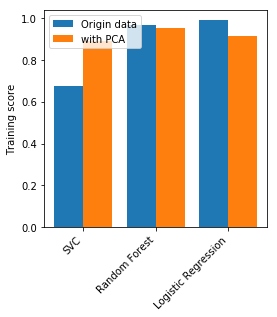

In [36]:
title = ['SVC', 'Random Forest', 'Logistic Regression']
fig, axe = plt.subplots(figsize=(4,4))
axe.bar([1,2,3], score_origin,width=0.4)
axe.bar([1.4, 2.4, 3.4], score_pca,width=0.4)
axe.set_xticks([1.2,2.2,3.2])
axe.set_xticklabels(title,rotation=45,horizontalalignment='right')
axe.legend(['Origin data', 'with PCA'])
axe.set_ylabel("Training score")
plt.show()